In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import seaborn as sns

In [58]:
data = pd.read_csv('Electric Vehicle Sales by State in India.csv')
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


## Basic Information
This section performs exploratory data analysis (EDA) to understand the dataset's structure, including:
- Data types and non-null counts (`info()`)
- Shape of the dataset (number of rows and columns)
- First and last five rows to inspect the data
- Column names
- Basic statistical summary (`describe()`) to analyze metrics like mean, min, max, and standard deviation for numerical columns.

In [59]:
print("Basic INformation\n\n",data.info())
print()
print("Shape of the dataset:",data.shape)
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)
print()
print("Basic Statictis",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB
Basic INformation

 None

Shape of the dataset: (96845, 8)
First Data

    Year Month_Name        Date           State         Vehicle_Class  \
0  2014        jan  01-01-2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan  01-01-2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan  01-01-2014  Andhra Pradesh             AMBULANCE   
3  2014     

In [60]:
print(data.shape)
print(data.columns)

(96845, 8)
Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


## Checking for Missing Values
This section checks the dataset for any missing values in each column using `isnull().sum()`. This is an important step to ensure the data is complete before proceeding with analysis or modeling.

In [61]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

## Feature Addition

C:\Users\HP\AppData\Local\Temp\ipykernel_19968\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


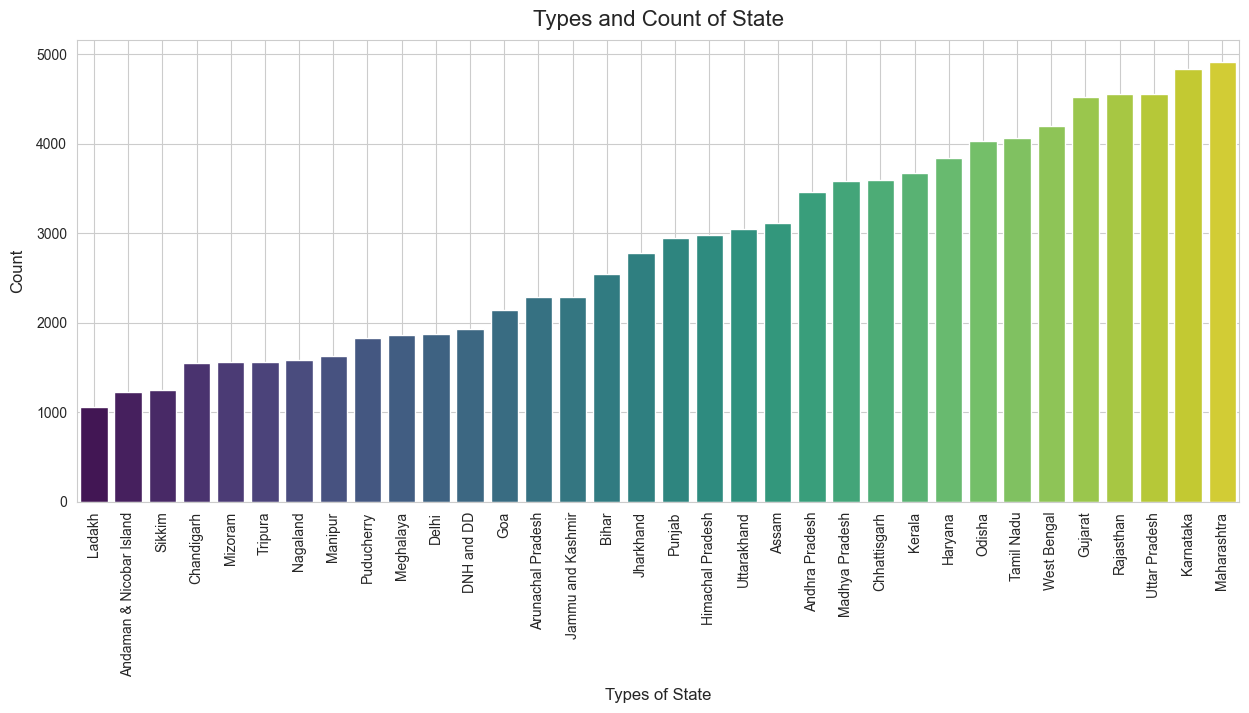

C:\Users\HP\AppData\Local\Temp\ipykernel_19968\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


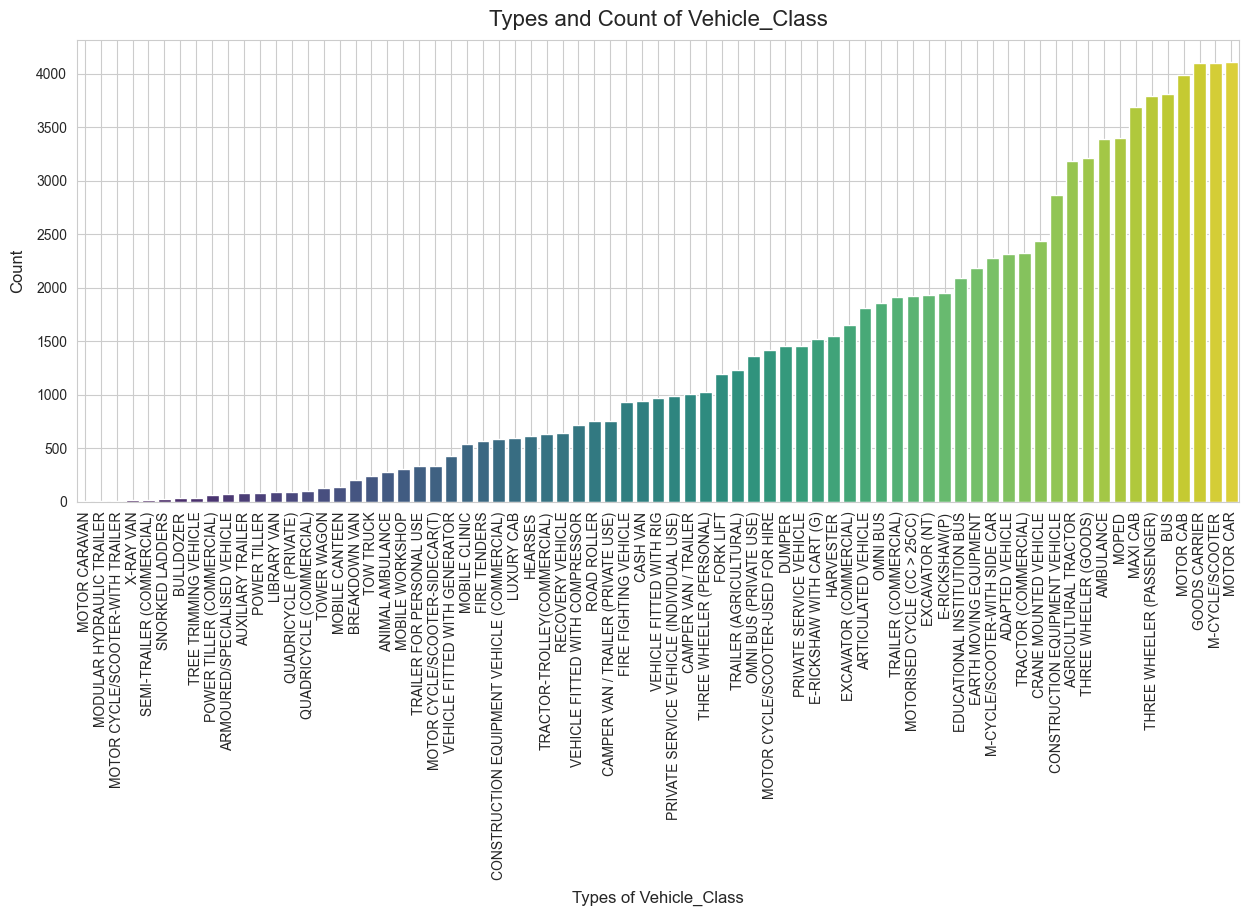

C:\Users\HP\AppData\Local\Temp\ipykernel_19968\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


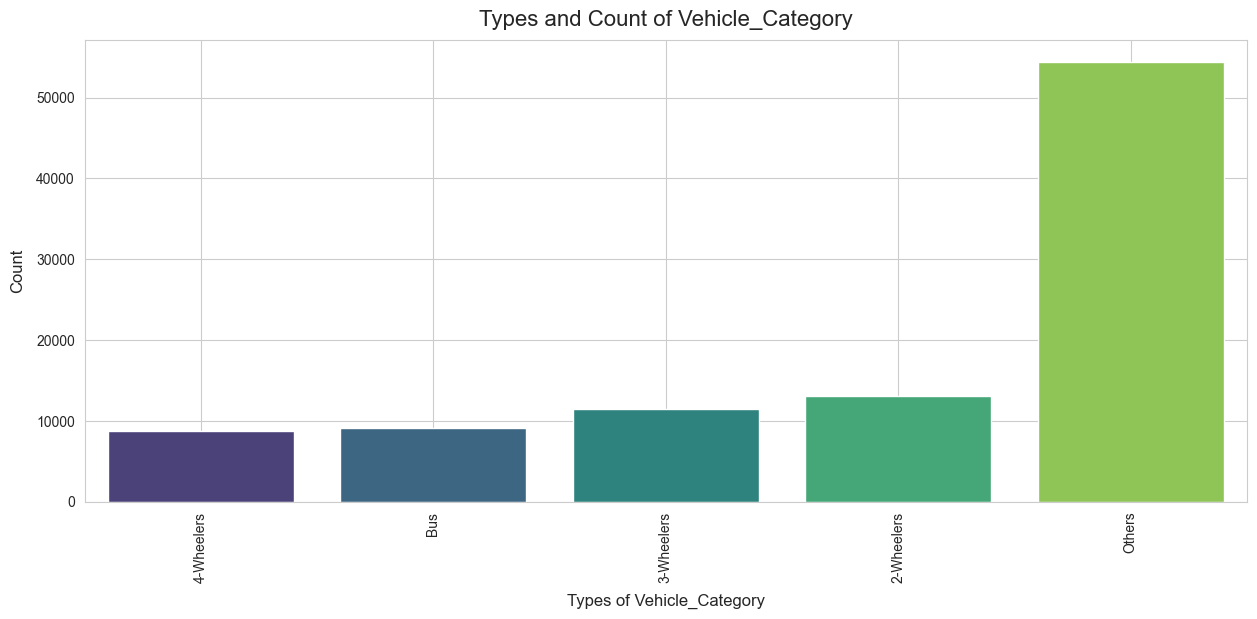

C:\Users\HP\AppData\Local\Temp\ipykernel_19968\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


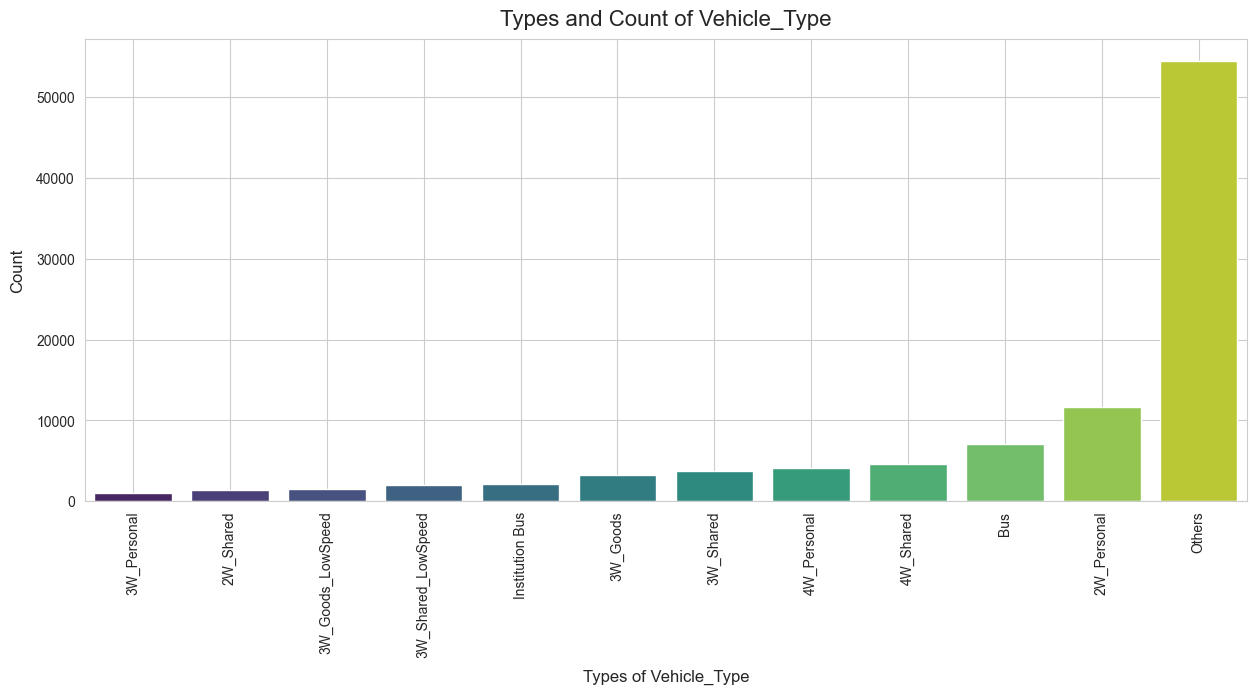

In [62]:
array = ['State','Vehicle_Class','Vehicle_Category','Vehicle_Type']
for i in array:
    plt.figure(figsize=(15,6))
    sns.set_style('whitegrid')  
    sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)
    plt.title(f"Types and Count of {i}", fontsize=16, pad=10)
    plt.ylabel("Count",labelpad=8,fontsize=12)
    plt.xlabel(f"Types of {i}",labelpad=8,fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.savefig(f'Outputs/Types and Count of {i}')
    plt.show()

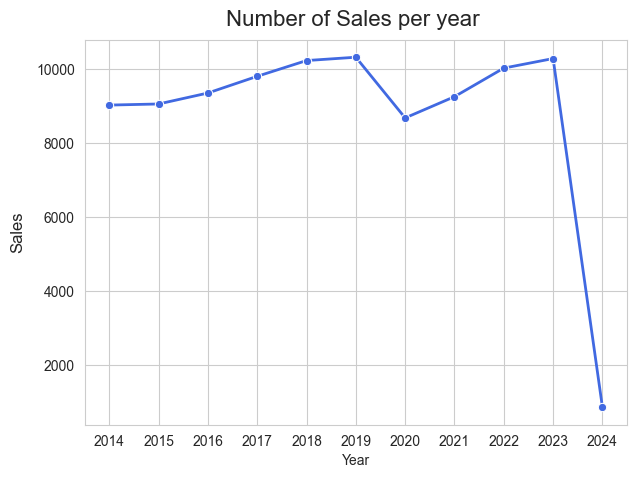

In [87]:
yearcount = data['Year'].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.lineplot(x=yearcount.index,y=yearcount.values,marker='o', color='royalblue', linewidth=2)
plt.xticks(ticks=yearcount.index)
plt.title("Number of Sales per year ",fontsize=16, pad=10)
plt.ylabel("Sales",labelpad=8,fontsize=12)
plt.grid(True)
plt.savefig(f'Outputs/Number of Sales per year')
plt.show()

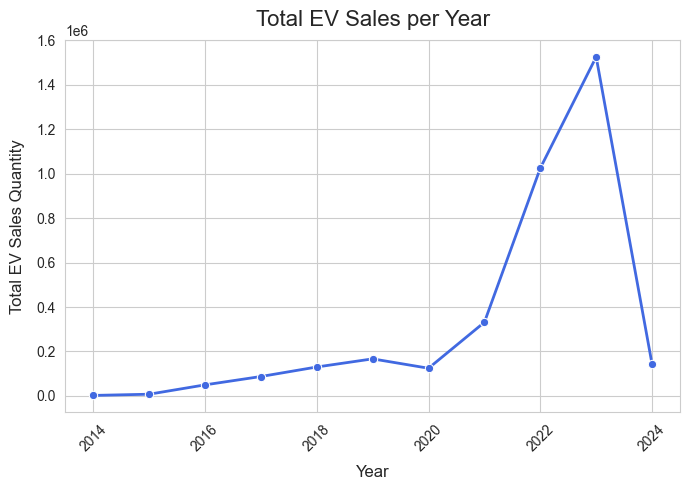

In [ ]:
# yearcount = data['Year'].value_counts().sort_index()
# Group full data by Year and sum EV_Sales_Quantity
yearly_total_sales = data.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.lineplot(
    x='Year',
    y='EV_Sales_Quantity',
    data=yearly_total_sales,
    marker='o',
    color='royalblue',
    linewidth=2
)

plt.title("Total EV Sales per Year", fontsize=16, pad=10)
plt.xlabel("Year", labelpad=8, fontsize=12)
plt.ylabel("Total EV Sales Quantity", labelpad=8, fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Outputs/Number_of_EV_Sales_Per_Year.png')
plt.show()

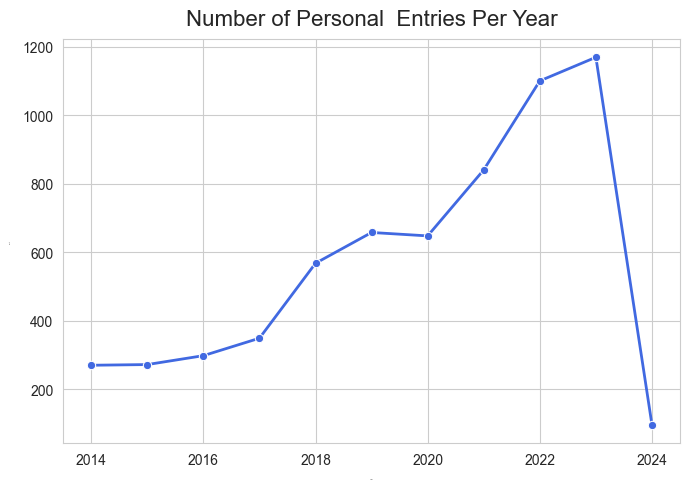

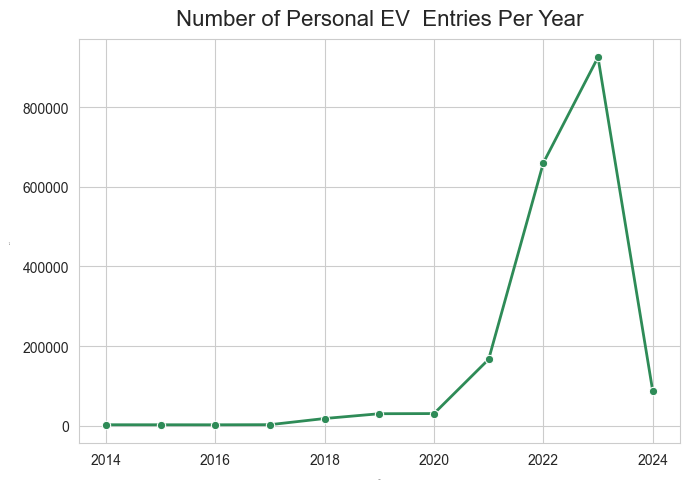

In [118]:
personal = data.loc[(data['Vehicle_Type'].str.contains(pat='Personal', case=False, na=False)) & (data['EV_Sales_Quantity'] > 0)]
yearcount = personal['Year'].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')

sns.lineplot(x=yearcount.index,y=yearcount.values,marker='o', color='royalblue', linewidth=2)
plt.title('Number of Personal  Entries Per Year',fontsize=16, pad=10)
plt.xlabel('Year',labelpad=8,fontsize=1)
plt.ylabel('Count',labelpad=8,fontsize=1)
plt.tight_layout()
plt.grid(True)
plt.savefig(f'Outputs/Number of Personal  Entries Per Year')
plt.show()

yearly_sales = personal.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=yearly_sales, marker='o', color='seagreen', linewidth=2)


plt.title('Number of Personal EV  Entries Per Year',fontsize=16, pad=10)
plt.xlabel('Year',labelpad=8,fontsize=1)
plt.ylabel('Count',labelpad=8,fontsize=1)
plt.tight_layout()
plt.grid(True)
plt.savefig(f'Outputs/Number of Personal EV Entries Per Year')
plt.show()
